<a href="https://colab.research.google.com/github/adhish-bahl/2347203_NNDL_Lab/blob/main/2347203_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Importing Libraries**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#### **Loading dataset into train and test variables**

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### **1. Data Preprocessing**

#### **Normalizing pixels value to be between 0 and 1**

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### **Converting class labels to one-hot encoded format**

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### **Data augmentation to improve generalization**

In [5]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
datagen.fit(x_train)

### **2/3. Network Architecture Design and Actiavtion Function**

#### **Designing the neural network**

In [6]:
model = Sequential()

#### **Flattening layer to convert 32x32x3 image to 3072 (32*32*3)**

In [7]:
model.add(Flatten(input_shape=(32, 32, 3)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Hidden layers**

In [8]:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

Adding Dropout to prevent overfitting

#### **Output layer with softmax activation for multi-class classification**

In [9]:
model.add(Dense(10, activation='softmax'))

#### **Summary of the model architecture**

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

**Justify your choice of network architecture, including the number of layers, types of layers, and the number of neurons/filters in each layer.**

Input Layer (Flatten): The CIFAR-10 images are 32x32x3, so the flatten layer converts this into a 3072-dimensional vector, making it suitable for fully connected layers.

Hidden Layer 1 (512 neurons, ReLU): A large number of neurons (512) allows the model to capture complex patterns, while ReLU helps avoid vanishing gradients and speeds up convergence.

Dropout (0.5): Added after the first hidden layer to prevent overfitting by randomly turning off 50% of the neurons during training.

Hidden Layer 2 (256 neurons, ReLU): A smaller layer than the first to reduce dimensionality and complexity, while still maintaining the network’s ability to learn patterns.

Output Layer (10 neurons, Softmax): Softmax activation provides class probabilities for the 10 categories, which is standard for multi-class classification.

**Explain why you selected a particular activation function and its role in
the backpropagation process.**

I selected ReLU for hidden layers because it helps prevent the vanishing gradient problem and allows faster convergence during backpropagation by only passing positive values.

For the output layer, Softmax is used to normalize the output into probabilities for multi-class classification, aiding in error calculation during backpropagation.

#### **4. Loss Function and Optimizer**

#### **Compile the model**

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Explain how the learning rate affects the backpropagation process.**

The learning rate controls the step size at which the model updates its weights during backpropagation. A high learning rate can lead to overshooting the optimal solution, causing instability, while a low learning rate results in slow convergence, requiring more epochs to reach the minimum of the loss function. Optimal learning rate ensures balanced and efficient convergence.

### **5. Training the model**

In [12]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 78ms/step - accuracy: 0.1788 - loss: 2.2200 - val_accuracy: 0.2664 - val_loss: 1.9990
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.2216 - loss: 2.0492 - val_accuracy: 0.3115 - val_loss: 1.9460
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.2418 - loss: 2.0125 - val_accuracy: 0.3141 - val_loss: 1.9569
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.2494 - loss: 1.9949 - val_accuracy: 0.3200 - val_loss: 1.9039
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.2598 - loss: 1.9846 - val_accuracy: 0.3220 - val_loss: 1.9461
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.2666 - loss: 1.9599 - val_accuracy: 0.3185 - val_loss: 1.9235
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.2684 - loss: 1.9617 - val_accuracy: 0.3144 - val_loss: 1.9318
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.2721 - loss: 1.9544 - val_accurac

**How does the choice of optimizer and learning rate influence the convergence of the network? How would you adjust the learning rate if the model is not converging properly?**

The choice of optimizer and learning rate directly affects how quickly and smoothly the model converges to the optimal solution. Optimizers like Adam adapt the learning rate dynamically for each parameter, improving convergence speed and stability, while SGD uses a fixed learning rate, often requiring more tuning.

If the model is not converging (e.g., loss oscillates or plateaus), the learning rate can be adjusted. You can reduce the learning rate to ensure smaller, more stable weight updates, or implement learning rate scheduling to gradually lower it during training for smoother convergence. If the rate is too low and learning is very slow, increase it slightly to accelerate progress.

**How does backpropagation update the weights in each layer, and what role does the learning rate play in this process?**

Backpropagation updates the weights in each layer by calculating the gradient of the loss function with respect to each weight through the chain rule. It propagates errors backward from the output to the input layer, adjusting weights to minimize the loss. The learning rate controls the size of these updates: a smaller rate makes the weight adjustments smaller and more precise, while a larger rate results in bigger updates, which may either speed up convergence or cause instability if too large.

### **6. Model Evaluation**

#### **Evaluate the model**

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 5ms/step - accuracy: 0.3568 - loss: 1.8807
Test accuracy: 0.35679998993873596


**Result:**

At 10 Epochs: The model's test accuracy of 0.0815 (or 8.15%) and loss of 2.4368 indicate that the model is performing poorly on the CIFAR-10 dataset. With 10 classes, random guessing would give an accuracy of around 10%, so achieving 8.15% accuracy means the model is barely better than random, if at all.

At 50 Epochs: The model's overall accuracy on the test set is 36%, which indicates it's only correctly classifying the test images about one-third of the time. This is quite low for a dataset like CIFAR-10, suggesting the model may need improvements.

#### **Predict labels**

In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


#### **Confusion Matrix**

In [15]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)

#### **Plot Confusion Matrix**

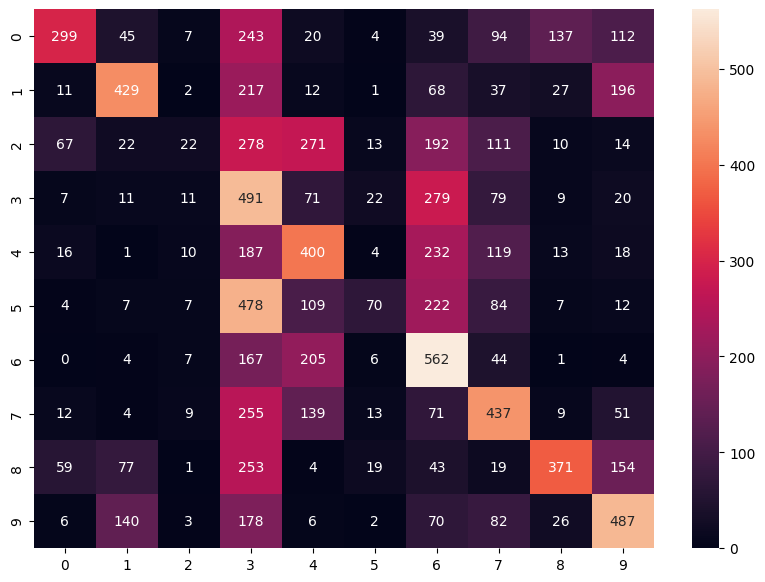

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

**Result:**

at 10 epochs: The confusion matrix illustrates that the model is struggling to classify the CIFAR-10 images accurately. Ideally, correct predictions would be along the diagonal of the matrix, but in this case, misclassifications are widespread across many classes. For example, class 0 (airplanes) is frequently confused with class 3 (cats) and class 5 (dogs), indicating that the model finds it difficult to differentiate between visually similar categories. Additionally, class 6 (frogs) shows a relatively better performance, with 562 correct predictions, but other classes such as 2 (birds) and 3 (cats) have significant misclassifications, often being predicted as other categories.

at 50 epochs: he confusion matrix displayed indicates that the model is having difficulty in accurately distinguishing between different classes. Diagonal elements represent correct classifications, while off-diagonal elements indicate misclassifications. For instance, class 0 (airplanes) is correctly predicted 299 times but is frequently confused with class 3 (cats) and class 5 (dogs). Similarly, class 1 (automobiles) has 429 correct predictions but is often misclassified as class 3 or class 8. Class 6 (frogs) shows a relatively better performance with 562 correct predictions, suggesting that the model is more effective at identifying this class compared to others.

#### **Classification Report**

In [17]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.62      0.30      0.40      1000
           1       0.58      0.43      0.49      1000
           2       0.28      0.02      0.04      1000
           3       0.18      0.49      0.26      1000
           4       0.32      0.40      0.36      1000
           5       0.45      0.07      0.12      1000
           6       0.32      0.56      0.40      1000
           7       0.40      0.44      0.42      1000
           8       0.61      0.37      0.46      1000
           9       0.46      0.49      0.47      1000

    accuracy                           0.36     10000
   macro avg       0.42      0.36      0.34     10000
weighted avg       0.42      0.36      0.34     10000



**Result:**

At 50 Ephocs: The classification report indicates that the model's overall performance is poor, with an accuracy of only 36%. The model struggles particularly with certain classes like birds, dogs, and cats, where both precision and recall are extremely low. The low recall across many classes suggests the model is failing to identify a significant number of true instances, leading to underperformance. Additionally, the F1-scores reveal an imbalance between precision and recall, indicating the model is not accurately classifying images and also missing many correct predictions. This suggests the need for a more robust architecture, likely a convolutional neural network (CNN), better data preprocessing, and additional training to improve generalization and overall accuracy.

**How can you further improve model performance if the accuracy is low?**

To improve model performance, switch to Convolutional Neural Networks (CNNs), as they are more suited for image classification tasks. Implement data augmentation and regularization techniques like Dropout and Batch Normalization to reduce overfitting and stabilize training. Increase the number of training epochs and use learning rate scheduling or adaptive optimizers like Adam for better convergence. Additionally, explore hyperparameter tuning and consider transfer learning with pretrained models to boost accuracy further.

### **7. Optimization Strategies**

#### **Define early stopping and learning rate scheduler**

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

#### **Train the model with early stopping and learning rate scheduling**

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=25,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - accuracy: 0.3170 - loss: 1.8595 - val_accuracy: 0.3630 - val_loss: 1.8475 - learning_rate: 0.0010
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.3142 - loss: 1.8668 - val_accuracy: 0.3667 - val_loss: 1.8617 - learning_rate: 0.0010
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.3144 - loss: 1.8522 - val_accuracy: 0.3658 - val_loss: 1.8636 - learning_rate: 0.0010
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.3163 - loss: 1.8541 - val_accuracy: 0.3724 - val_loss: 1.8409 - learning_rate: 0.0010
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.3202 - loss: 1.8499 - val_accuracy: 0.3654 - val_loss: 1.8521 - learning_rate: 0.0010
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.3182 - loss: 1.8562 - val_accuracy: 0.3773 - val_loss: 1.8161 - learning_rate: 0.0010
Epoch 7/25
347/782 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.3233 - loss: 1.8520

**Why is weight initialization important, and how does it impact the
convergence of your network?**

Weight initialization is important to prevent **vanishing or exploding gradients**, which can slow or destabilize training. Proper initialization ensures faster and more stable **convergence** by starting the model closer to optimal solutions. It also **breaks symmetry** between neurons, allowing them to learn distinct features. Poor initialization can cause the network to struggle in learning patterns, leading to slow or ineffective training. Overall, it helps the network train more efficiently and effectively.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()